In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

Epoch 1, Train Loss: 0.2864, Test Loss: 0.1682
Epoch 2, Train Loss: 0.1335, Test Loss: 0.1213
Epoch 3, Train Loss: 0.1013, Test Loss: 0.1107
Epoch 4, Train Loss: 0.0817, Test Loss: 0.0796
Epoch 5, Train Loss: 0.0694, Test Loss: 0.1000
Epoch 6, Train Loss: 0.0605, Test Loss: 0.0889
Epoch 7, Train Loss: 0.0524, Test Loss: 0.0797
Epoch 8, Train Loss: 0.0486, Test Loss: 0.1024
Epoch 9, Train Loss: 0.0446, Test Loss: 0.1111
Epoch 10, Train Loss: 0.0382, Test Loss: 0.0844


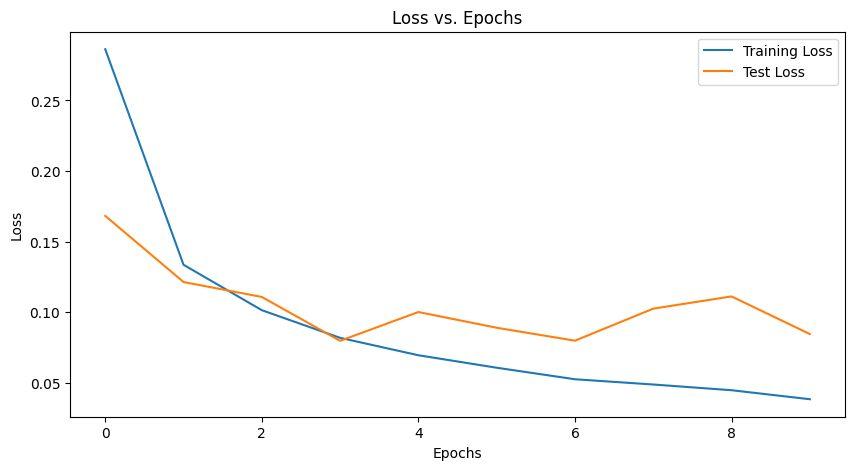

In [11]:
class FNN(nn.Module):
    def __init__(self):
        super(FNN, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

def train(model, device, train_loader, optimizer, criterion):
    model.train()
    train_loss = 0
    for data, target in train_loader:
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    avg_loss = train_loss / len(train_loader)
    return avg_loss

def test(model, device, test_loader, criterion):
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            loss = criterion(output, target)
            test_loss += loss.item()
    avg_loss = test_loss / len(test_loader)
    return avg_loss

def main():
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
    train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
    test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

    model = FNN().to(device)
    optimizer = optim.Adam(model.parameters())
    criterion = nn.CrossEntropyLoss()

    epochs = 10
    training_losses = []
    test_losses = []

    for epoch in range(epochs):
        train_loss = train(model, device, train_loader, optimizer, criterion)
        test_loss = test(model, device, test_loader, criterion)
        training_losses.append(train_loss)
        test_losses.append(test_loss)
        print(f"Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.plot(training_losses, label='Training Loss')
    plt.plot(test_losses, label='Test Loss')
    plt.title('Loss vs. Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()
